Problem Set:

You have been approached by a leading ed-tech platform to seek actionable business insights.
Before they hire you as a consultant, they have shared a sample data set with you and has
given you a problem statement to test your approach and skills. This sample data set is of their
free learners who became leads for a paid course through the platform. (Cost of Paid course =
INR 100,000).Some of these learners also paid for the said course.
What this data set contains:

1. User name
2. Their Age
3. City they are in
4. Their Education background
5. Domain of their work
6. Channel from which they were acquired on to the platform
7. Info about whether they have paid for a paid course

More about the channel: There are many ways through which users are acquired on the
platform, for eg, organic, from social media influencers, from paid ads, etc. These channels are
named as Channel 1, Channel 2 and so on for simplicity.There is a cost attached to each and
every channel of acquisition.

Channel 1 - INR 90 per user

Channel 2 - INR 0 per user

Channel 3 - INR 250 per user

Channel 4 - INR 350 per user

Channel 5 - INR 180 per user

The said Ed tech platform is looking to increase profitability and reduce their cost of acquisition
This can be achieved when

1. They know more about the profile of users that are most likely to pay
2. They are able to understand and discontinue the channels that have not been profitable

You are required to

1. Analyze the user profiles and come up with the most likely profile that is most
likely to pay for a paid course

2. Analyze the channels from which the users were acquired and give
recommendations about what channels should be continued and what channels
should be discontinued.

Guidelines:
1. Perform Exploratory Data Analysis or any other relevant technique on the data set to find
the solution. Smart approach will be appreciated. Avoid unnecessary steps.

2. Give visualizations in the form of (eg., tables, graphs, charts, heat maps, if relevant)

3. Explain each and every step

4. Make suitable assumptions wherever necessary. Please give the rationale behind such
assumptions
5. Most important: Give your answer in two stages:

a. The most probable user profile that is likely to pay

b. Recommendations about what channels of acquisition should be retained and
what should be discontinued.

In [298]:
# import 'Pandas'
import pandas as pd

# import 'Numpy'
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn'
import seaborn as sns

# to suppress warnings
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None

# to display the float values upto 6 decimal places
pd.options.display.float_format = '{:.6f}'.format

# import train-test split
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler

# import various functions from sklearn
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, RocCurveDisplay
from sklearn.metrics import accuracy_score
from scipy import stats
import itertools
import scipy.stats as stats
from scipy.stats import ranksums
from scipy.stats import skew

from itertools import cycle

from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, LabelBinarizer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
import statsmodels
import statsmodels.api as sm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,log_loss
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint


# import function to perform feature selection
from sklearn.feature_selection import RFE, SequentialFeatureSelector

# change the size of the graphs
plt.rcParams['figure.figsize'] = [15,8]
sns.set()

In [299]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [300]:
df=pd.read_csv('/content/drive/MyDrive/Assignment - Data Set.csv')
df.head()

,Serial Number,Name,Paid for the Course,Age,City,Education,Domain,Channel Name
0,1,Miranda Bush,0,37,Jaipur,BBM/MCA/MBA/Management & Others,IT/Software/Programming/Testing/Devops/Product...,Channel 2
1,2,Todd Romero,0,32,Chandigarh,Engineering,Other,Channel 2
2,3,Jenna Higgins,0,44,Bangalore,Engineering,Other,Channel 3
3,4,Dawn Davis,0,18,Indore,Engineering,Admin/Data Entry/Secretary/Front Office,Channel 1
4,5,Kelly Ruiz,0,19,Firozabad,BCA,IT/Software/Programming/Testing/Devops/Product...,Channel 1


Display the DataFrame with the target ('Paid for the Course') column moved to the extreme right

In [301]:
target_column = df.pop('Paid for the Course')
df['Paid for the Course'] = target_column
df.head(2)

,Serial Number,Name,Age,City,Education,Domain,Channel Name,Paid for the Course
0,1,Miranda Bush,37,Jaipur,BBM/MCA/MBA/Management & Others,IT/Software/Programming/Testing/Devops/Product...,Channel 2,0
1,2,Todd Romero,32,Chandigarh,Engineering,Other,Channel 2,0


In [302]:
df.shape

(10000, 8)

In [303]:
# Rows-> 10000
# Columns-> 8

In [304]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Serial Number        10000 non-null  int64 
 1   Name                 10000 non-null  object
 2   Age                  10000 non-null  int64 
 3   City                 10000 non-null  object
 4   Education            10000 non-null  object
 5   Domain               10000 non-null  object
 6   Channel Name         10000 non-null  object
 7   Paid for the Course  10000 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 625.1+ KB


In [305]:
# Target variable is  Paid for the Course
# The dataset seems well-structured with no missing values in any of the columns.

In [306]:
df.columns

Index(['Serial Number', 'Name', 'Age', 'City', 'Education', 'Domain',
       'Channel Name', 'Paid for the Course'],
      dtype='object')

In [307]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Serial Number,10000.000000,5000.500000,2886.895680,1.000000,2500.750000,5000.500000,7500.250000,10000.000000
Age,10000.000000,31.126500,8.846046,17.000000,24.000000,31.000000,40.000000,45.000000
Paid for the Course,10000.000000,0.067500,0.250898,0.000000,0.000000,0.000000,0.000000,1.000000


In [308]:
# The dataset includes information on individuals with an age range from 17 to 45 years.
# The mean age in the dataset is approximately 31.13 years, indicating a relatively young to middle-aged population.
# The standard deviation of 8.85 suggests a moderate amount of variability in ages around the mean.
# The 25th percentile (Q1) is 24 years, and the 75th percentile (Q3) is 40 years, providing insights into the age distribution within the dataset.
# The majority of individuals fall within the age range of 24 to 40 years based on the interquartile range (IQR).

In [309]:
df.describe(include=object).T

,count,unique,top,freq
Name,10000,9431,Christopher Johnson,6
City,10000,103,Bangalore,471
Education,10000,14,Engineering,4942
Domain,10000,15,IT/Software/Programming/Testing/Devops/Product...,3084
Channel Name,10000,5,Channel 1,4000


In [310]:
#There are 9,431 unique names out of 10,000 entries.
#The most common name is "Christopher Johnson," occurring 6 times in the dataset.


#The dataset includes information from 103 unique cities.
#The most frequent city is "Bangalore," appearing 471 times.

#There are 14 unique education categories.
#The most common educational background is "Engineering," accounting for 4,942 entries.


#There are 15 unique domains represented in the dataset.
#The majority of individuals are associated with the "IT/Software/Programming/Testing/Devops/Product..." domain, with 3,084 entries.


#There are 5 unique channel names.
#"Channel 1" is the most frequently occurring channel, appearing 4,000 times.


### Numerical columns and Categorical columns

In [311]:
# select numerical columns
numeric_data = df.select_dtypes(include=[np.number])
# select categorical columns
categorical_data = df.select_dtypes(exclude=[np.number])
print('number of numeric_data',numeric_data.shape[1])
print('number of categorical_data',categorical_data.shape[1])
print('\n')
numeric=numeric_data.columns.tolist()
categorical=categorical_data.columns.tolist()
print(f'numeric_data:\t{numeric}\n')

print('categorical_data:\t',categorical)

number of numeric_data 3
number of categorical_data 5


numeric_data:	['Serial Number', 'Age', 'Paid for the Course']

categorical_data:	 ['Name', 'City', 'Education', 'Domain', 'Channel Name']


# Data Clearning

In [312]:
for col_name in numeric:
    negatives = set()
    for value in df[col_name]:
        if value < 0:
            negatives.add(value)
    print(f"Unique negative values for column '{col_name}': {negatives}")

Unique negative values for column 'Serial Number': set()
Unique negative values for column 'Age': set()
Unique negative values for column 'Paid for the Course': set()


In [313]:
# Negative values might indicate errors in data collection or recording.But here in this dataset there is no negative value.

Serial Number and Name is unique and is not important for classification and hence will be dropped.

In [314]:
df.drop(columns=['Serial Number','Name'],inplace=True)

### Checking For Duplicate Value

In [315]:
# count the number of duplicates based on all columns
duplicates = df.duplicated()
num_duplicates = duplicates.sum()

# print the number of duplicates
print(num_duplicates)

1203


**Removing the duplicate record.**

In [316]:
df = df.drop_duplicates().reset_index(drop=True)

In [317]:
# The absence of duplicate values is a positive attribute for a dataset, indicating good data quality and integrity.

### Missing value Treatment

In [318]:
total_missing=df.isnull().sum().sort_values(ascending=False)
percentage_of_missing = ((df.isnull().sum()/df.shape[0])*100).sort_values(ascending=False)
missing_value_df = pd.concat([total_missing, percentage_of_missing], axis=1, keys = ['Total values missing',
                                                                                     'Percentage of Missing Values'])
missing_value_df

,Total values missing,Percentage of Missing Values
Age,0,0.000000
City,0,0.000000
Education,0,0.000000
Domain,0,0.000000
Channel Name,0,0.000000
Paid for the Course,0,0.000000


In [319]:
#  The absence of missing values contributes to the overall quality and reliability of your dataset,
#  making it more suitable for analysis, modeling, and reporting purposes.

### Outlier Treatment

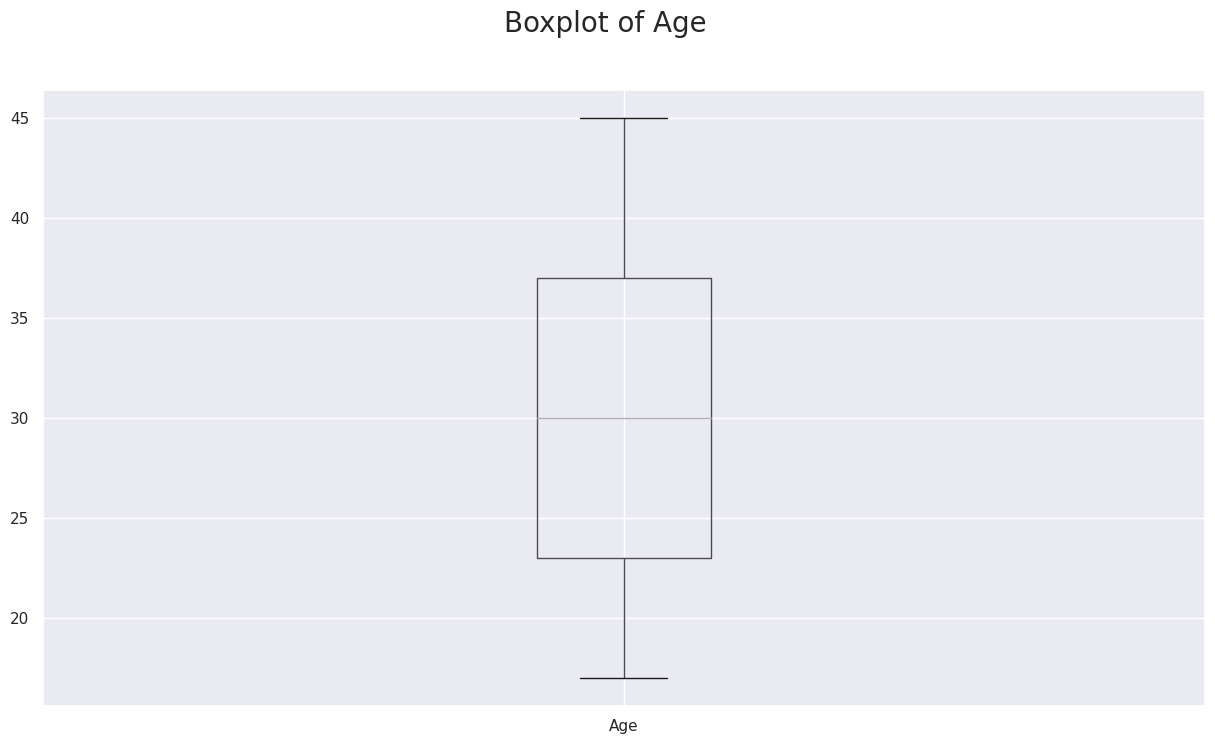

In [320]:
df.boxplot(column='Age')
plt.suptitle("Boxplot of Age\n", fontsize=20)
plt.show()

In [321]:
# The age data is relatively evenly distributed, and there are no extreme values (outliers) that significantly deviate from the general pattern.

## Statistical Analysis of Data

### Chi-square test of independence
Null hypothesis: There is no relationship between the two categorical variables.

Alternative hypothesis: There is a relationship between the two categorical variables.

In [322]:
from scipy.stats import chi2_contingency
categorical_data = ['City', 'Education', 'Domain', 'Channel Name']
# Define function to perform chi-square test of independence
def chi_square_test(var, target):
    contingency_table = pd.crosstab(df[var], df[target])
    chi2, pval, dof, expected = chi2_contingency(contingency_table)
    alpha = 0.05
    if pval < alpha:
        result = 'Reject null hypothesis'
    else:
        result = 'Fail to reject null hypothesis'
    return pd.DataFrame({'Variable': [var], 'Target': [target], 'p-value': [pval], 'Result': [result]})

# perform chi-square test
results = pd.DataFrame()
for var in categorical_data[:-1]:
    result = chi_square_test(var, 'Paid for the Course')
    results = pd.concat([results, result], ignore_index=True)

results

,Variable,Target,p-value,Result
0,City,Paid for the Course,0.000000,Reject null hypothesis
1,Education,Paid for the Course,0.683990,Fail to reject null hypothesis
2,Domain,Paid for the Course,0.000002,Reject null hypothesis


The Chi-square test results indicate that the variables "City" and "Domain" are likely associated with the likelihood of paying for the course. In contrast, "Education" do not show significant evidence of a relationship with the target variable.

### Checking the assumptions
Checking the assumptions of the Independent Samples t-test involves assessing the normality of the data and the
homogeneity of variances between the two groups

#### Shapiro-Wilk test for normality

H0: The data is normally distributed.

H1: The data is not normally distributed.

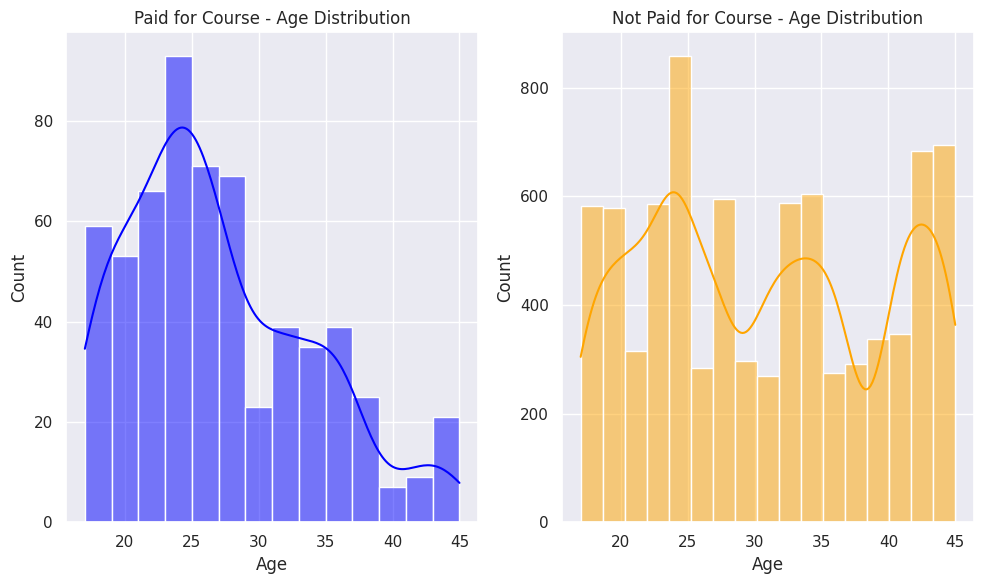

Shapiro-Wilk Test for Normality:
Paid for Course - W-statistic: 0.9451898336410522, p-value: 3.2102294591053807e-14
Not Paid for Course - W-statistic: 0.9386074542999268, p-value: 0.0


In [323]:
from scipy.stats import shapiro
paid_age = df[df['Paid for the Course'] == 1]['Age']
not_paid_age = df[df['Paid for the Course'] == 0]['Age']

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.histplot(paid_age, kde=True, color='blue', label='Paid for Course')
plt.title('Paid for Course - Age Distribution')

plt.subplot(1, 2, 2)
sns.histplot(not_paid_age, kde=True, color='orange', label='Not Paid for Course')
plt.title('Not Paid for Course - Age Distribution')

plt.tight_layout()
plt.show()

# Shapiro-Wilk test for normality
stat_paid, p_paid = shapiro(paid_age)
stat_not_paid, p_not_paid = shapiro(not_paid_age)

print("Shapiro-Wilk Test for Normality:")
print(f"Paid for Course - W-statistic: {stat_paid}, p-value: {p_paid}")
print(f"Not Paid for Course - W-statistic: {stat_not_paid}, p-value: {p_not_paid}")

#### Levene's test for homogeneity of variances

Null Hypothesis (H0):

The variances of the groups are equal.

Alternative Hypothesis (H1):

The variances of the groups are not equal (there is at least one group with a different variance).

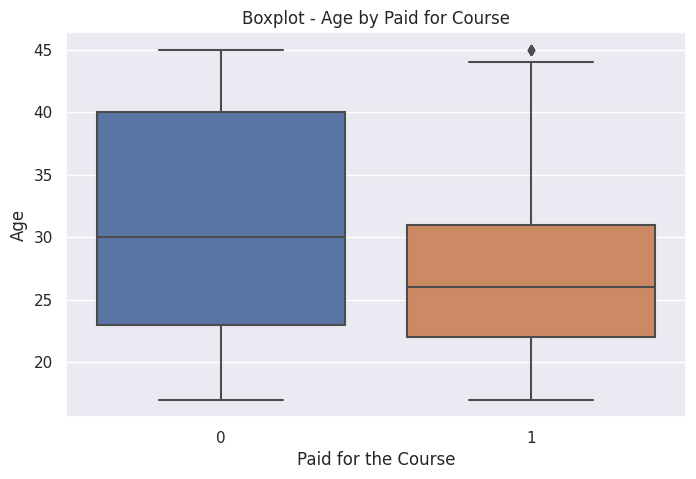

Levene's Test for Homogeneity of Variances:
Levene's Statistic: 143.86304083427322, p-value: 6.867390590726791e-33


In [324]:
from scipy.stats import levene
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Paid for the Course'], y=df['Age'])
plt.title('Boxplot - Age by Paid for Course')
plt.show()

# Levene's test for homogeneity of variances
stat_levene, p_levene = levene(paid_age, not_paid_age)

print("Levene's Test for Homogeneity of Variances:")
print(f"Levene's Statistic: {stat_levene}, p-value: {p_levene}")

In [325]:
# Based on the violations of normality and homogeneity of variances, and the results of the Mann-Whitney U test ,
# the Mann-Whitney U test is an appropriate test for your scenario.

### Mann-Whitney Test

Null Hypothesis (H0):

There is no difference in the distribution of the variable between the two groups.

Alternative Hypothesis (H1):

There is a difference in the distribution of the variable between the two groups.

In [326]:
from scipy.stats import mannwhitneyu
import pandas as pd

result = mannwhitneyu(df[df['Paid for the Course'] == 1]['Age'],
                      df[df['Paid for the Course'] == 0]['Age'])


print("Mann-Whitney U Statistic:", result.statistic)
print("p-value:", result.pvalue)


alpha = 0.05
if result.pvalue < alpha:
    print("Reject the null hypothesis: There is a significant difference in age between those who paid for the course and those who didn't.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in age between those who paid for the course and those who didn't.")


Mann-Whitney U Statistic: 1879299.0
p-value: 2.920901056923251e-24
Reject the null hypothesis: There is a significant difference in age between those who paid for the course and those who didn't.


In [327]:
# The small p-value (8.05e-41) provides strong evidence to reject the null hypothesis.
# Therefore, there is a significant difference in age between individuals who paid for the course and those who did not.
# This suggests that age is likely a relevant factor influencing the likelihood of payment for the course.

## **VISUALISATION OF DATA**

**Categorical Variable**

## **Identifying Top Cities with Optimal Course Conversion Rates**

<Figure size 1200x800 with 0 Axes>

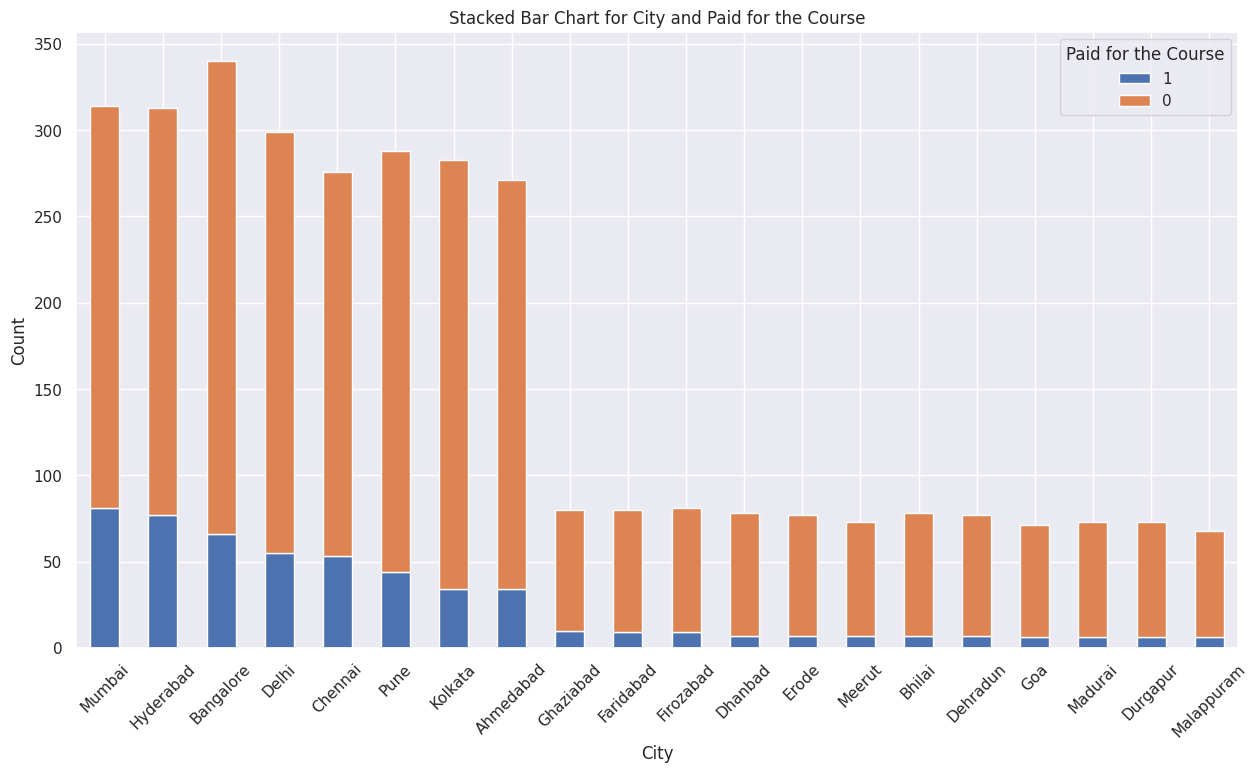

In [328]:
target_variable = 'Paid for the Course'
# creating a cross tab
cross_tab = pd.crosstab(df['City'], df[target_variable])

# Selecting only the top 20 categories
city_counts_top = cross_tab.sort_values(by=1, ascending=False).head(20)

# Reorder columns so that 'Paid for the Course' comes first
city_counts_top = city_counts_top[[1, 0]]

# Create a stacked bar chart
plt.figure(figsize=(12, 8))
city_counts_top.plot(kind='bar', stacked=True)
plt.title(f'Stacked Bar Chart for City and {target_variable}')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title=target_variable)
plt.show()

In [329]:
# Among the top cities, Mumbai has the highest count of individuals who paid for the course , followed by Bangalore and Hyderabad.
# Chennai, Delhi, Pune , Kolkata  and Ahmedabad also have notable counts of individuals who paid for the course.
# This analysis helps identify cities with high conversion rates, areas for improvement, and potential growth opportunities.

**City-wise Percentage Conversion**

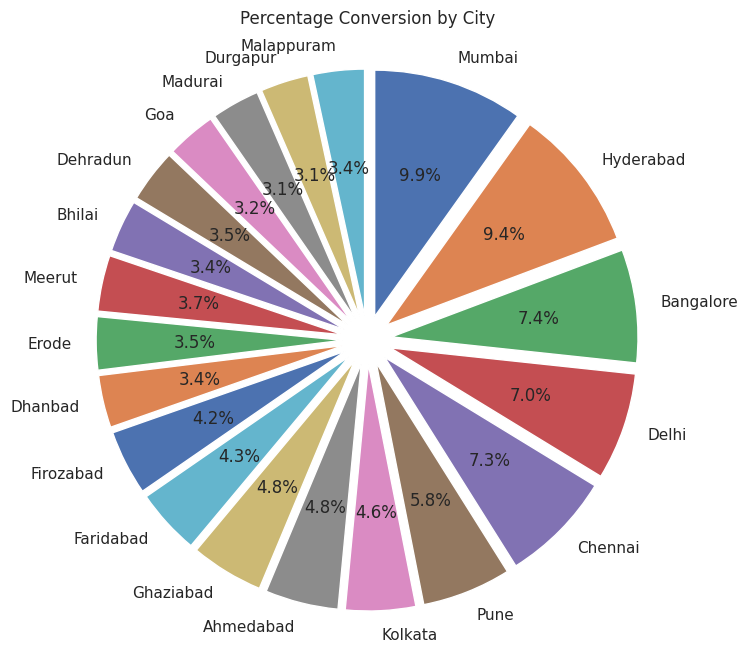

In [330]:
city_counts_top = city_counts_top[[1, 0]]

# Calculate conversion percentages
conversion_percentages = city_counts_top[1] / (city_counts_top[1] + city_counts_top[0]) * 100

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(conversion_percentages, labels=city_counts_top.index, autopct='%1.1f%%', startangle=90, counterclock=False, explode=[0.1] * len(city_counts_top))
plt.title('Percentage Conversion by City')
plt.show()

In [331]:
#Mumbai, Bangalore, and Hyderabad have the highest conversion rates, indicating a more significant likelihood of users from these cities paying for the course.

#Chennai and Delhi also show considerable conversion rates, making them important cities for potential paying users.

#Pune, Kolkata, and Ahmedabad exhibit moderate conversion rates, contributing to the overall success in user conversion.

#Cities with lower conversion rates include Ghaziabad, Faridabad, Firozabad, Dhanbad, Durgapur, Erode, Meerut, Bhilai, Dehradun, Malappuram, Goa, and Madurai.

**Identifying Top Education background of individuals with Optimal Course Conversion Rates**

<Figure size 1500x800 with 0 Axes>

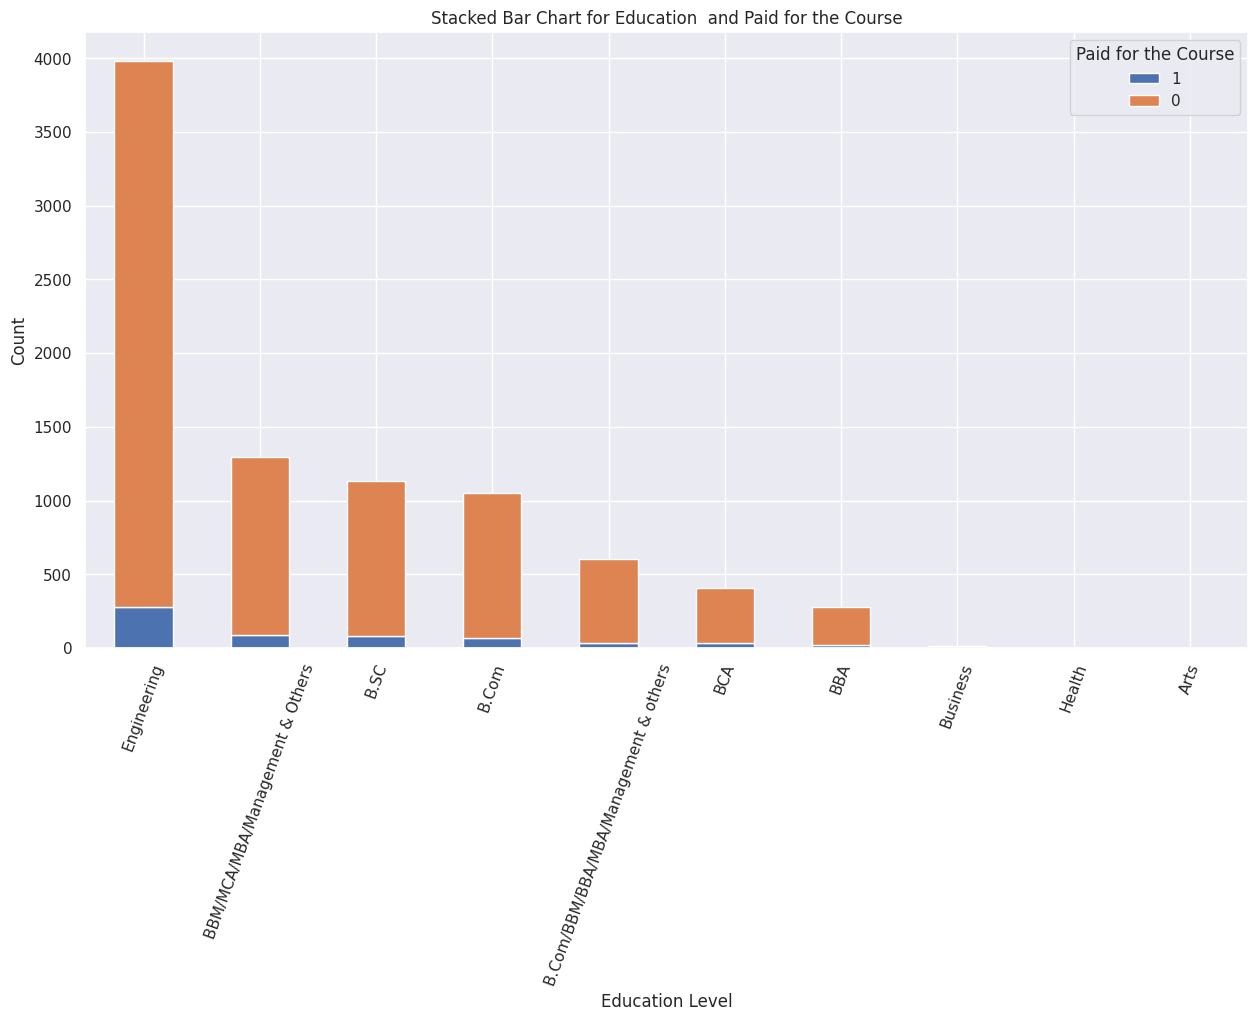

In [332]:
# Creating a cross-tab
cross_tab = pd.crosstab(df['Education'], df[target_variable])

# Selecting only the top 5 categories
education_counts_top = cross_tab.sort_values(by=1, ascending=False).head(10)

# Reorder columns so that 'Paid for the Course' comes first
education_counts_top = education_counts_top[[1, 0]]

# Create a stacked bar chart
plt.figure(figsize=(15, 8))
education_counts_top.plot(kind='bar', stacked=True)
plt.title(f'Stacked Bar Chart for Education  and {target_variable}')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=70)
plt.legend(title=target_variable)
plt.show()

In [333]:
#Individuals with an 'Engineering' background exhibit the highest course conversion rates.

#'BBM/MCA/MBA/Management & Others' , 'B.SC' and 'B.Com' also show substantial conversion.

**Identifying Top Domain with Optimal Course Conversion Rates**

<Figure size 1200x1000 with 0 Axes>

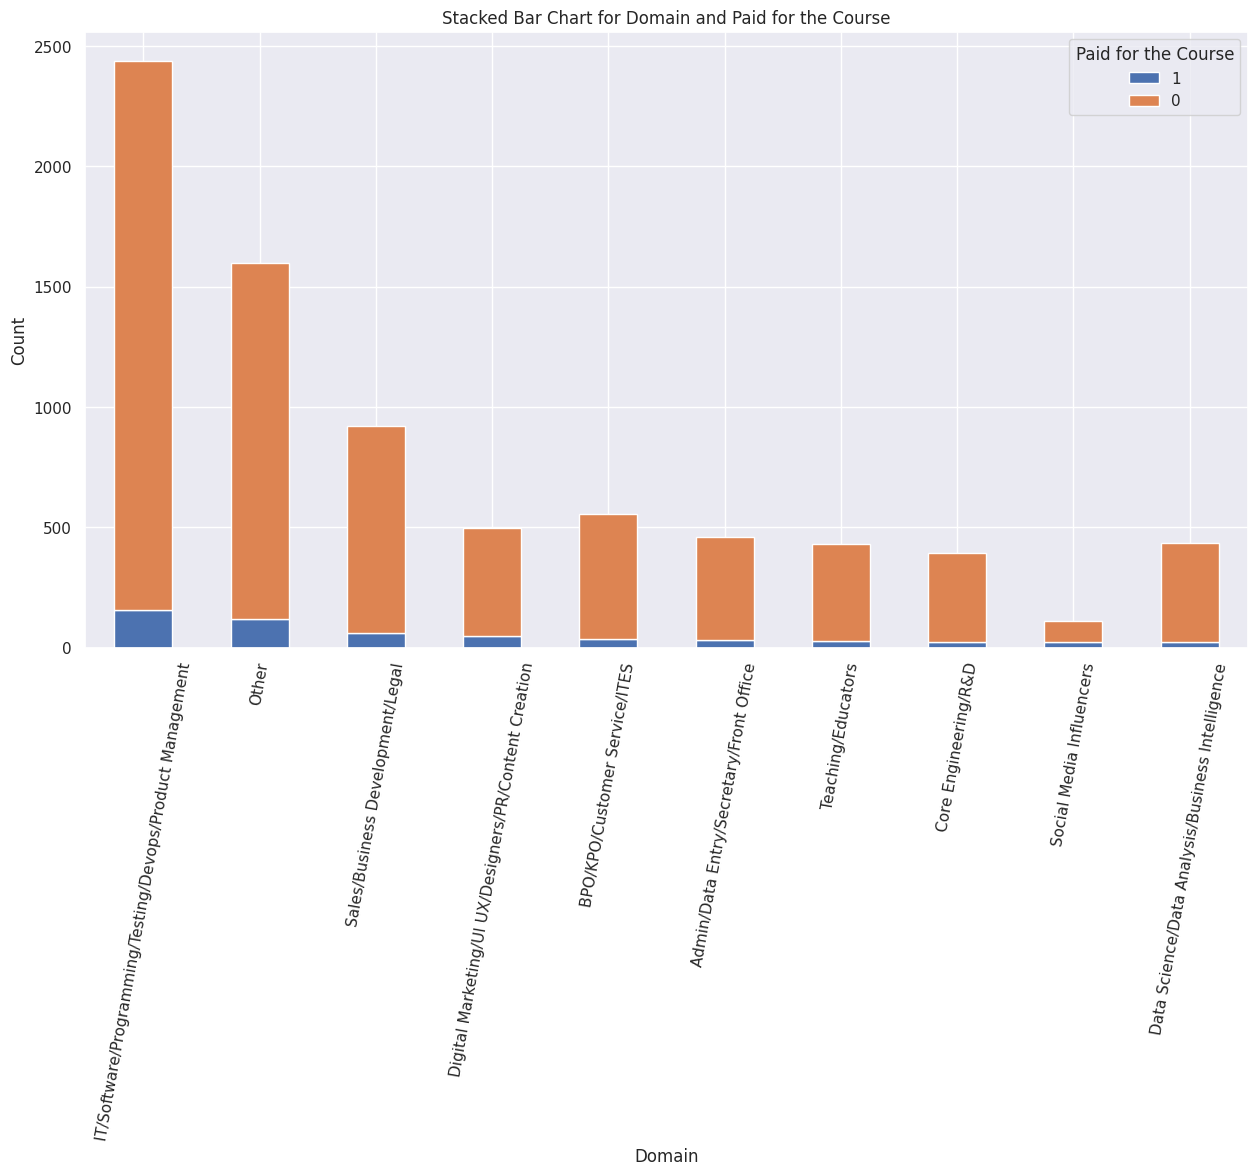

In [334]:
# Creating a cross-tab
cross_tab = pd.crosstab(df['Domain'], df[target_variable])

# Selecting only the top 5 categories
domain_counts_top = cross_tab.sort_values(by=1, ascending=False).head(10)

# Reorder columns so that 'Paid for the Course' comes first
domain_counts_top = domain_counts_top[[1, 0]]

# Create a stacked bar chart
plt.figure(figsize=(12, 10))
domain_counts_top.plot(kind='bar', stacked=True)
plt.title(f'Stacked Bar Chart for Domain and {target_variable}')
plt.xlabel('Domain')
plt.ylabel('Count')
plt.xticks(rotation=80)
plt.legend(title=target_variable)
plt.show()

In [335]:
# 'IT/Software/Programming/Testing/Devops/Product Management' emerges as the leading domain with the highest course conversions. ie. The IT sector exhibits a strong interest in upskilling or learning.

# 'Other' domains show significant engagement, indicating a diverse audience interested in paid courses.

# 'Sales/Business Development/Legal' and 'Digital Marketing/UI UX/Designers/PR/Content Creation' also attract notable interest.

#'Data Science/Data Analysis/Business Intelligence' faces challenges in course conversions

**Identifying Top Channel Name with Optimal Course Conversion Rates**

<Figure size 1200x1000 with 0 Axes>

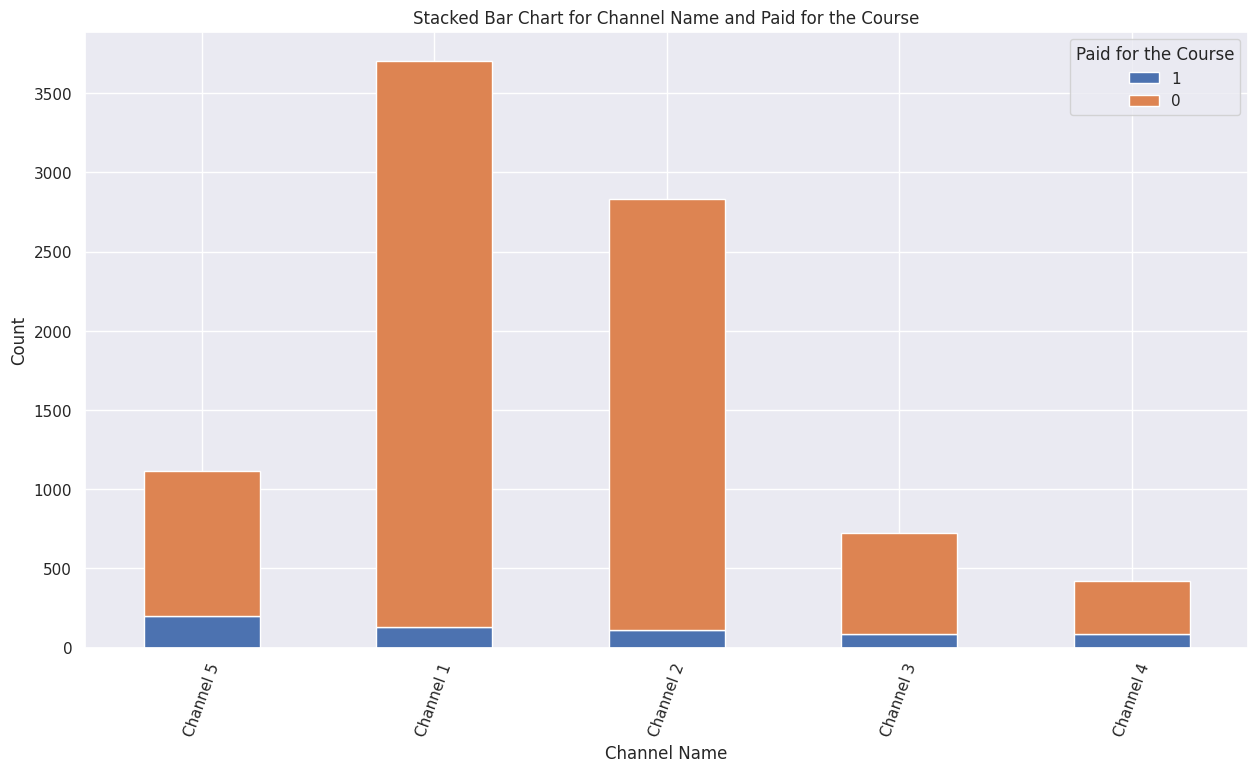

In [336]:
# Creating a cross-tab
cross_tab = pd.crosstab(df['Channel Name'], df[target_variable])

# Selecting only the top 5 categories
channel_counts_top = cross_tab.sort_values(by=1, ascending=False).head(10)

# Reorder columns so that 'Paid for the Course' comes first
channel_counts_top = channel_counts_top[[1, 0]]

# Create a stacked bar chart
plt.figure(figsize=(12, 10))
channel_counts_top.plot(kind='bar', stacked=True)
plt.title(f'Stacked Bar Chart for Channel Name and {target_variable}')
plt.xlabel('Channel Name')
plt.ylabel('Count')
plt.xticks(rotation=70)
plt.legend(title=target_variable)
plt.show()

In [337]:
# Channel 5 has the highest total conversions.
# Channel 1 follows as the second top-performing channel.

**Channel-wise Percentage Conversion**

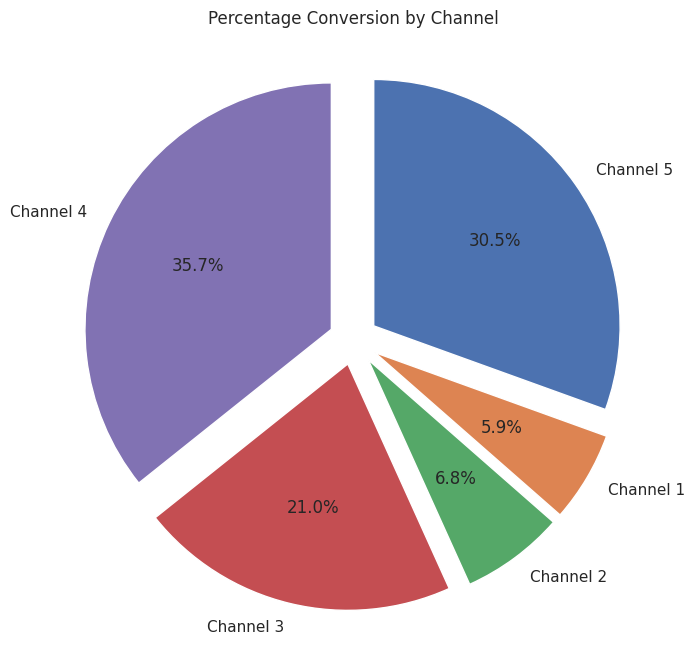

In [338]:
channel_counts_top = channel_counts_top[[1, 0]]

# Calculate conversion percentages
conversion_percentages = channel_counts_top[1] / (channel_counts_top[1] + channel_counts_top[0]) * 100

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(conversion_percentages, labels=channel_counts_top.index, autopct='%1.1f%%', startangle=90, counterclock=False, explode=[0.1] * len(channel_counts_top))
plt.title('Percentage Conversion by Channel')
plt.show()

In [339]:
# Channel 4 has the highest conversion rate (21%), making it a profitable channel.

# Channels 5 and 3 also show moderate conversion rates and are recommended for retention.

# Channels 1 and 2 have lower conversion rates and may require optimization or evaluation for continued use.

**Numerical Variable**

VIOLIN PLOT

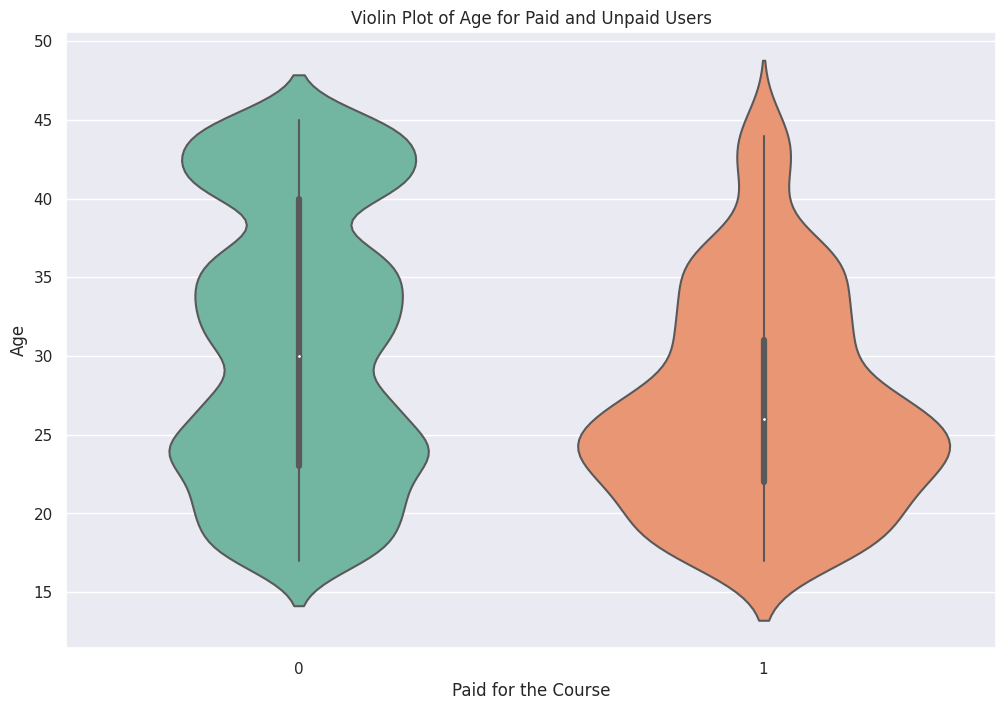

In [340]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='Paid for the Course', y='Age', data=df, palette='Set2')
plt.title('Violin Plot of Age for Paid and Unpaid Users')
plt.show()

In [341]:
 # Both groups have a noticeable concentration around age 24, but the distribution of users who paid is more symmetrical.
 # The distribution of users who did not pay is more spread out and slightly right-skewed.

**Count of Users in Different Age Groups who Paid and Did Not Pay for the Course**

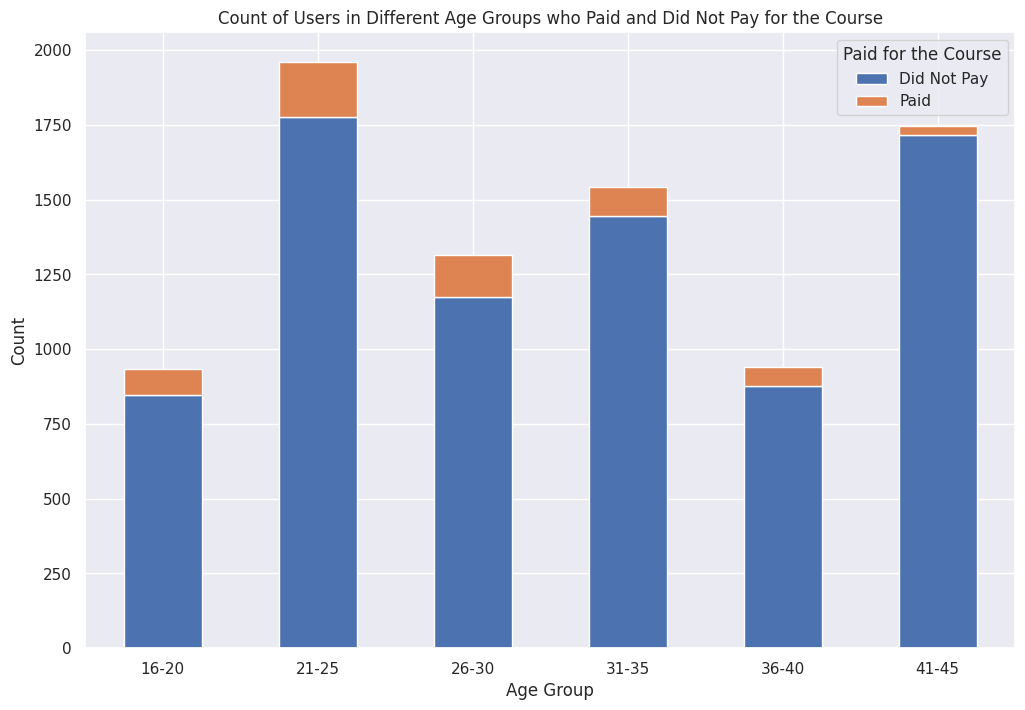

In [342]:
bins = [16, 20, 25, 30, 35, 40, 45, 50]
labels = ['16-20', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50']


df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Calculate the cross-tab
age_crosstab = pd.crosstab(df['Age Group'], df['Paid for the Course'])

# Exclude the 'Total' row if present
age_crosstab_plot = age_crosstab[[0, 1]].iloc[:-1]

# Plotting the bar chart
age_crosstab_plot.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Count of Users in Different Age Groups who Paid and Did Not Pay for the Course')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Paid for the Course', labels=['Did Not Pay', 'Paid'])
plt.show()

In [343]:
 # Age groups 21-25 and 26-30 have a higher likelihood of paying for the course, while age groups 31-35, 36-40, and 41-45 show a lower likelihood of payment.
 # Age group 46-50 has the lowest likelihood of paying for the course.

In [344]:
bins = [20, 25, 30, 35, 40, 45, 50]  # Adjusted to include both edges
labels = ['16-20', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50']

conditions = [
    (df['Age'] >= 16) & (df['Age'] <= 20),
    (df['Age'] >= 21) & (df['Age'] <= 25),
    (df['Age'] >= 26) & (df['Age'] <= 30),
    (df['Age'] >= 31) & (df['Age'] <= 35),
    (df['Age'] >= 36) & (df['Age'] <= 40),
    (df['Age'] >= 41) & (df['Age'] <= 45),
    (df['Age'] >= 46) & (df['Age'] <= 50),
]

df['Age Group'] = np.select(conditions, labels)

df_age_groups = df.groupby(['Age Group', 'Paid for the Course']).size().unstack(fill_value=0).reset_index()

# Drop the original 'Age' column
df = df.drop('Age', axis=1)
print(df_age_groups)
df.head()

Paid for the Course Age Group     0    1
0                       16-20  1160  112
1                       21-25  1760  192
2                       26-30  1176  130
3                       31-35  1462   94
4                       36-40   904   51
5                       41-45  1726   30


,City,Education,Domain,Channel Name,Paid for the Course,Age Group
0,Jaipur,BBM/MCA/MBA/Management & Others,IT/Software/Programming/Testing/Devops/Product...,Channel 2,0,36-40
1,Chandigarh,Engineering,Other,Channel 2,0,31-35
2,Bangalore,Engineering,Other,Channel 3,0,41-45
3,Indore,Engineering,Admin/Data Entry/Secretary/Front Office,Channel 1,0,16-20
4,Firozabad,BCA,IT/Software/Programming/Testing/Devops/Product...,Channel 1,0,16-20


# **Encoding**

In [345]:
column_names = ['City', 'Education', 'Domain', 'Channel Name']

for i in column_names:
    unique_values = df[i].nunique()
    print(f'Unique values in {i}: {unique_values}')

Unique values in City: 103
Unique values in Education: 14
Unique values in Domain: 15
Unique values in Channel Name: 5


**N-1 dummy encoding**

In [346]:
# Perform n-1 dummy encoding for categorical variables
df_encoded = pd.get_dummies(df, columns=['City', 'Education', 'Domain', 'Channel Name','Age Group'])
df_encoded.head(2)

,Paid for the Course,City_Agra,City_Ahmedabad,City_Ajmer,City_Aligarh,City_Amravati,City_Amritsar,City_Asansol,City_Aurangabad,City_Bangalore,City_Bareilly,City_Belgaum,City_Bhavnagar,City_Bhilai,City_Bhiwandi,City_Bhopal,City_Bhubaneswar,City_Bijapur,City_Bikaner,City_Bilaspur,City_Bokaro Steel City,City_Chandigarh,City_Chennai,City_Coimbatore,City_Cuttack,City_Dehradun,City_Delhi,City_Dhanbad,City_Durgapur,City_Erode,City_Faridabad,City_Firozabad,City_Ghaziabad,City_Goa,City_Gorakhpur,City_Gulbarga,City_Guntur,City_Gurgaon,City_Guwahati,City_Gwalior,City_Hamirpur,City_Hubli–Dharwad,City_Hyderabad,City_Indore,City_Jabalpur,City_Jaipur,City_Jalandhar,City_Jammu,City_Jamnagar,City_Jamshedpur,City_Jhansi,City_Jodhpur,City_Kakinada,City_Kannur,City_Kanpur,City_Kochi,City_Kolhapur,City_Kolkata,City_Kollam,City_Kozhikode,City_Kurnool,City_Lucknow,City_Ludhiana,City_Madurai,City_Malappuram,City_Mangalore,City_Mathura,City_Meerut,City_Moradabad,City_Mumbai,City_Mysore,City_Nagpur,City_Nanded,City_Nashik,City_Nellore,City_Noida,City_Patna,City_Pondicherry,City_Pune,City_Purulia Prayagraj,City_Raipur,City_Rajahmundry,City_Rajkot,City_Ranchi,City_Rourkela,City_Salem,City_Sangli,City_Shimla,City_Siliguri,City_Solapur,City_Srinagar,City_Surat,City_Thiruvananthapuram,City_Thrissur,City_Tiruchirappalli,City_Tiruppur,City_Ujjain,City_Vadodara,City_Varanasi,City_Vasai-Virar City,City_Vellore,City_Vijayawada,City_Visakhapatnam,City_Warangal,Education_Arts,Education_B.Com,Education_B.Com/BBM/BBA/MBA/Management & others,Education_B.SC,Education_BBA,Education_BBM/MCA/MBA/Management & Others,Education_BCA,Education_Biology & Life Science,Education_Business,Education_Computer Science,Education_Computers & Mathematics,Education_Engineering,Education_Health,Education_Other,Domain_Admin/Data Entry/Secretary/Front Office,Domain_BFSI/Tax/Audit/Insurance/Accounts/CA/Company Secretary,Domain_BPO/KPO/Customer Service/ITES,Domain_Core Engineering/R&D,Domain_Data Science/Data Analysis/Business Intelligence,Domain_Digital Marketing/UI UX/Designers/PR/Content Creation,Domain_Ed-Tech,Domain_Hospitality/Travel,Domain_IT/Software/Programming/Testing/Devops/Product Management,Domain_Management/Leadership/Business Owner/Startup Founder/CXO,Domain_Other,Domain_Pharma/Medical/Biotech/Healthcare,Domain_Sales/Business Development/Legal,Domain_Social Media Influencers,Domain_Teaching/Educators,Channel Name_Channel 1,Channel Name_Channel 2,Channel Name_Channel 3,Channel Name_Channel 4,Channel Name_Channel 5,Age Group_16-20,Age Group_21-25,Age Group_26-30,Age Group_31-35,Age Group_36-40,Age Group_41-45
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [347]:
df=df_encoded.copy()

In [348]:
df.shape

(8797, 144)

In [349]:
# count the number of duplicates based on all columns
duplicates = df.duplicated()
num_duplicates = duplicates.sum()

# print the number of duplicates
print(num_duplicates)

1575


In [350]:
df = df.drop_duplicates().reset_index(drop=True)

# **Checking for Class Imbalance**

In [351]:
target_count = df['Paid for the Course'].value_counts()
target_count*100/df.shape[0]

0   92.882858
1    7.117142
Name: Paid for the Course, dtype: float64

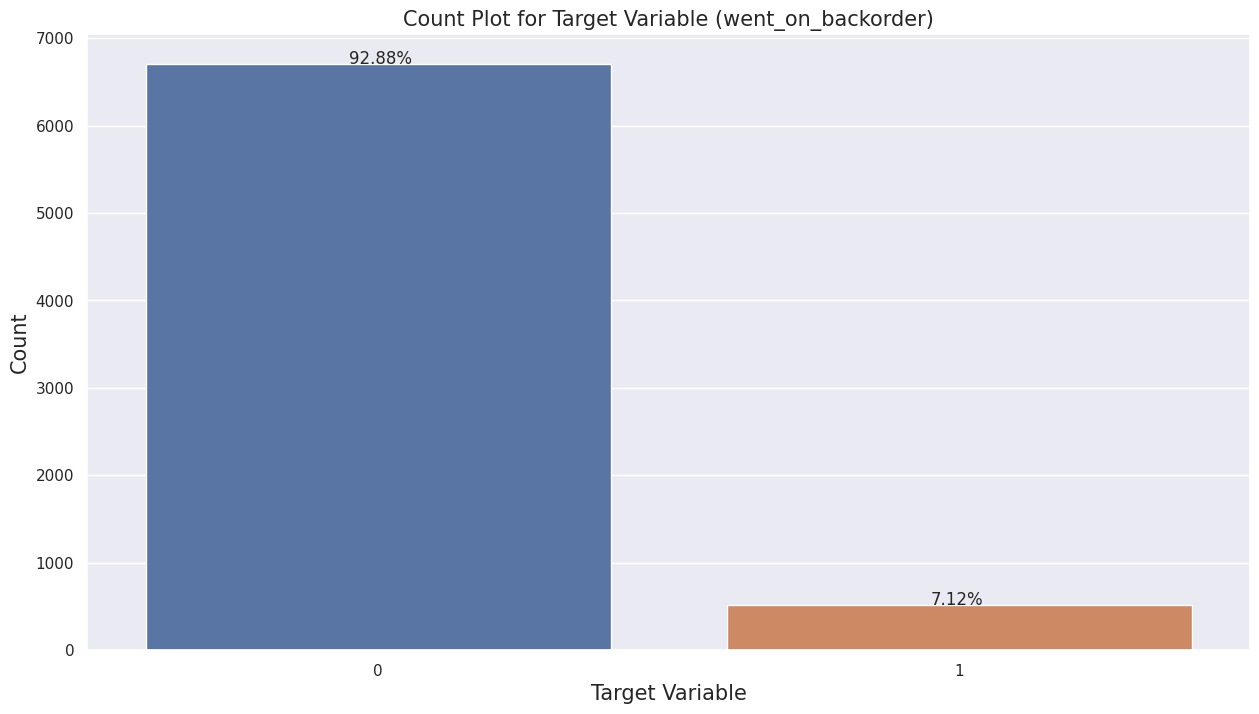

In [352]:
# consider only the target variable
df_target = df['Paid for the Course'].copy()

# get counts of 0's and 1's in the 'Chance of Admit' variable
df_target.value_counts()

# plot the countplot of the variable 'Chance of Admit'
sns.countplot(x = df_target)

# use below code to print the values in the graph
# 'x' and 'y' gives position of the text
# 's' is the text
plt.text(x = -0.05, y = df_target.value_counts()[0] + 1, s = str(round((df_target.value_counts()[0])*100/len(df_target),2)) + '%')
plt.text(x = 0.95, y = df_target.value_counts()[1] +1, s = str(round((df_target.value_counts()[1])*100/len(df_target),2)) + '%')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Count Plot for Target Variable (went_on_backorder)', fontsize = 15)
plt.xlabel('Target Variable', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

# to show the plot
plt.show()

In [353]:
# Class 0 has approximately 83.82% of the samples.
# Class 1 has approximately 16.18% of the samples.

**Modeling Without SMOTE**

In [354]:
X = df.drop('Paid for the Course', axis=1)
y = df['Paid for the Course']
X = sm.add_constant(X)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print('X_train:',X_train.shape)
print('X_test:',X_test.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)

X_train: (5055, 144)
X_test: (2167, 144)
y_train: (5055,)
y_test: (2167,)


In [355]:
# create a generalized function to calculate the metrics values for train set
def get_train_report(model):

    # for training set:
    # train_pred: prediction made by the model on the train dataset 'X_train'
    # y_train: actual values of the target variable for the train dataset

    # predict the output of the target variable from the train data
    train_pred = model.predict(X_train)

    # return the performace measures on train set
    return(classification_report(y_train, train_pred))

In [356]:
# create a generalized function to calculate the metrics values for test set
def get_test_report(model):

    # for test set:
    # test_pred: prediction made by the model on the test dataset 'X_test'
    # y_test: actual values of the target variable for the test dataset

    # predict the output of the target variable from the test data
    test_pred = model.predict(X_test)

    # return the performace measures on test set
    return(classification_report(y_test, test_pred))

**Logistic regression model (Base Model)**

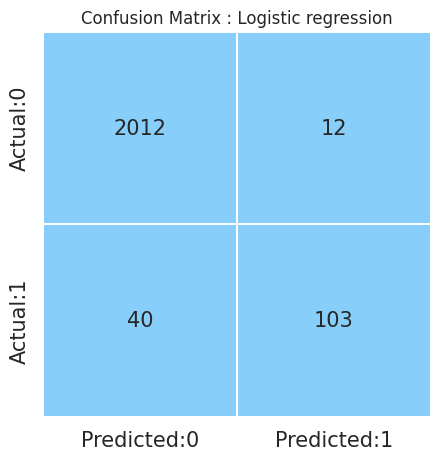

In [357]:
LR =LogisticRegression()
lr_model=LR.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False,
            linewidths = 0.1, annot_kws = {'size':15})
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('Confusion Matrix : Logistic regression')
plt.show()

Logistic regression model produced the following results:

There were 2012 true negatives (i.e., the model correctly predicted that 2012 instances were negative).

There were 12 false positives (i.e., the model incorrectly predicted that 12 instances were positive).

There were 40 false negatives (i.e., the model incorrectly predicted that 40 instances were negative).

There were 103 true positives (i.e., the model correctly predicted that 103 instances were positive).

In [358]:
print('Train Report: \n',get_train_report(LR))
print('Test Report: \n',get_test_report(LR))

Train Report: 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      4684
           1       0.91      0.67      0.77       371

    accuracy                           0.97      5055
   macro avg       0.94      0.83      0.88      5055
weighted avg       0.97      0.97      0.97      5055

Test Report: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      2024
           1       0.90      0.72      0.80       143

    accuracy                           0.98      2167
   macro avg       0.94      0.86      0.89      2167
weighted avg       0.97      0.98      0.97      2167



In [359]:
# The model performs well on both precision and recall for non-payment (class 0), indicating a good ability to correctly identify non-payments.
# For payment (class 1), while precision is relatively high, recall is lower, suggesting that the model may miss some actual payments.

**ROC curve**

**RandomForestClassifier**

In [360]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
kappa = cohen_kappa_score(y_test, y_pred)
y_prob = rfc.predict_proba(X_test)
cross_entropy = log_loss(y_test, y_prob)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)
print('AUC-ROC:', roc_auc)
print('kappa value:',kappa)
print('Cross Entropy',cross_entropy)
print('Train Report: \n',get_train_report(rfc))
print('Test Report: \n',get_test_report(rfc))

Accuracy: 0.9907706506691278
Precision: 0.9624060150375939
Recall: 0.8951048951048951
F1-score: 0.927536231884058
AUC-ROC: 0.9463172696868348
kappa value: 0.9226146050202302
Cross Entropy 0.03325000594454723
Train Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4684
           1       0.99      1.00      1.00       371

    accuracy                           1.00      5055
   macro avg       1.00      1.00      1.00      5055
weighted avg       1.00      1.00      1.00      5055

Test Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      2024
           1       0.96      0.90      0.93       143

    accuracy                           0.99      2167
   macro avg       0.98      0.95      0.96      2167
weighted avg       0.99      0.99      0.99      2167



In [361]:
# The model performs exceptionally well, achieving high accuracy, precision, recall, and F1-score on both the training and test sets.
# The AUC-ROC (Area Under the Receiver Operating Characteristic Curve) score for the Random Forest Classifier (RFC) model is 94.63%.
# A high AUC-ROC score is indicative of the model's excellent ability to distinguish between positive and negative instances across various threshold values.
# The model appears well-fitted to the data, capturing patterns effectively.
# Cross-Entropy is low, indicating good alignment between predicted and true probabilities.

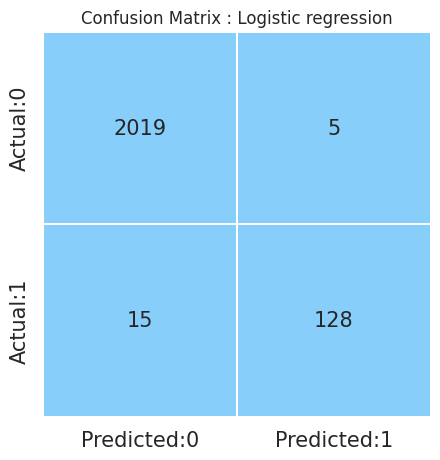

In [362]:
y_pred = rfc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False,
            linewidths = 0.1, annot_kws = {'size':15})
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('Confusion Matrix : Logistic regression')
plt.show()

In [363]:
# rfc model produced the following results:

# There were 2019 true negatives (i.e., the model correctly predicted that 2019 instances were negative).

# There were 5 false positives (i.e., the model incorrectly predicted that 5 instances were positive).

# There were 15 false negatives (i.e., the model incorrectly predicted that 15 instances were negative).

# There were 128 true positives (i.e., the model correctly predicted that 128 instances were positive).

In [364]:
clfs = {'Logreg' : LR,
       'KNN' : KNeighborsClassifier(),
       'Decision Tree' : DecisionTreeClassifier(),
       'RandomForest' : rfc,
       'AdaBoost' : AdaBoostClassifier(),
       'Gradient Boosting' : GradientBoostingClassifier(),
       'XGBoost' : XGBClassifier(),
       'SVM' : SVC(probability=True)}

models_report = pd.DataFrame(columns = ['Model','Accuracy','Recall','Precision','F1','Kappa_score','auc_roc_score'])

for clf , clf_name in list(zip(clfs.values() , clfs.keys())):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print('Fitting the Model..........',clf_name)
    t=pd.Series({
        'Model' : clf_name,
        'Accuracy' : accuracy_score(y_test , y_pred),
        'Recall' :recall_score(y_test , y_pred),
        'Precision' : precision_score(y_test,y_pred),
        'F1' : f1_score(y_test , y_pred),
        'Kappa_score': cohen_kappa_score(y_test, y_pred),
        'auc_roc_score': roc_auc_score(y_test, y_pred)
    })
    models_report = models_report.append(t,ignore_index = True)

models_report = models_report.sort_values(by = 'Recall' , ascending = False)
models_report

Fitting the Model.......... Logreg
Fitting the Model.......... KNN
Fitting the Model.......... Decision Tree
Fitting the Model.......... RandomForest
Fitting the Model.......... AdaBoost
Fitting the Model.......... Gradient Boosting
Fitting the Model.......... XGBoost
Fitting the Model.......... SVM


,Model,Accuracy,Recall,Precision,F1,Kappa_score,auc_roc_score
2,Decision Tree,0.991694,0.930070,0.943262,0.936620,0.932176,0.963059
6,XGBoost,0.993078,0.923077,0.970588,0.946237,0.942540,0.960550
3,RandomForest,0.990771,0.895105,0.962406,0.927536,0.922615,0.946317
5,Gradient Boosting,0.989848,0.874126,0.968992,0.919118,0.913717,0.936075
7,SVM,0.991232,0.874126,0.992063,0.929368,0.924714,0.936816
0,Logreg,0.976004,0.720280,0.895652,0.798450,0.785852,0.857175
1,KNN,0.970928,0.629371,0.900000,0.740741,0.725851,0.812215
4,AdaBoost,0.961698,0.524476,0.833333,0.643777,0.624641,0.758532


In [365]:
# When using recall as the evaluation metric, models like Decision Tree, XGBoost, and RandomForest perform well in identifying positive instances.

**FEATURE IMPORTANCE**

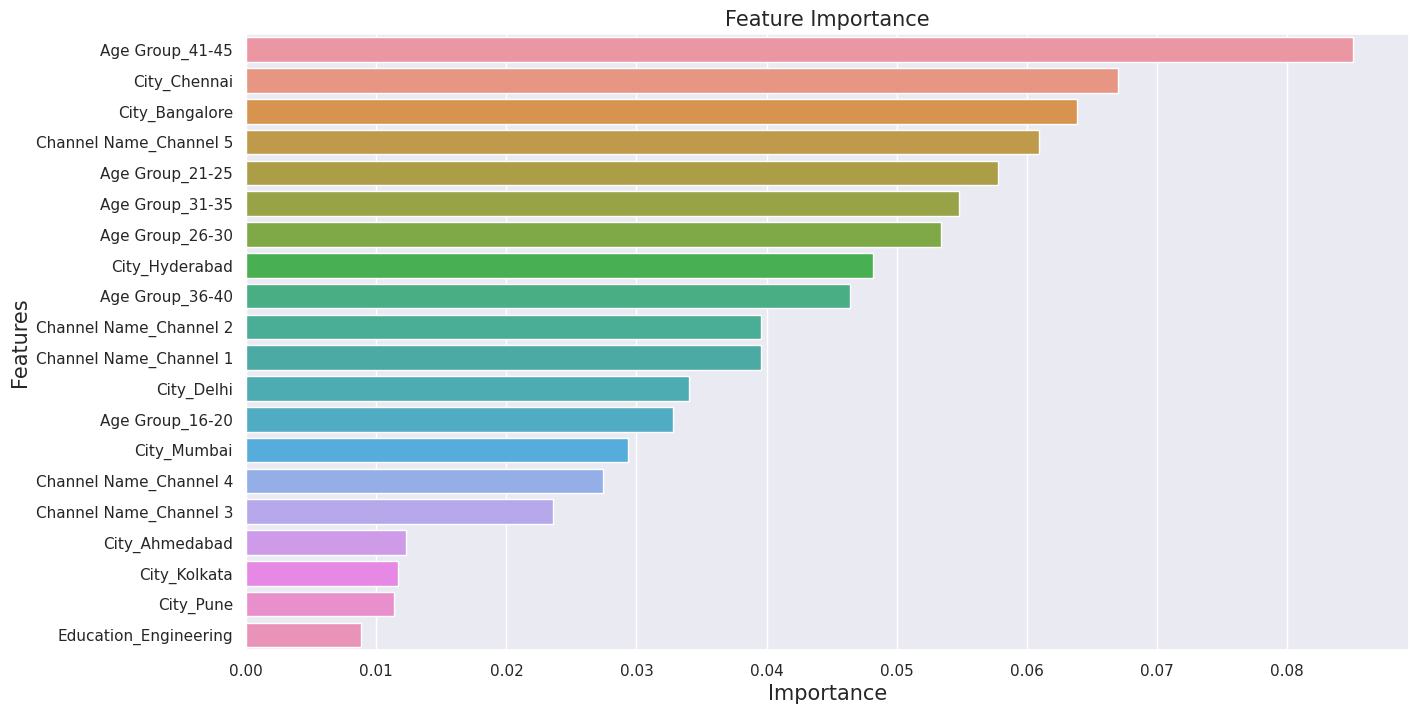

In [367]:
# create a dataframe that stores the feature names and their importance
# 'feature_importances_' returns the features based on the gini importance
important_features = pd.DataFrame({'Features': X_train.columns,
                                   'Importance': rfc.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)[:20]

# create a barplot to visualize the features based on their importance
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

# display the plot
plt.show()

In [ ]:
#Age Group_41-45 is the most important feature.

**AUC_ROC curve**

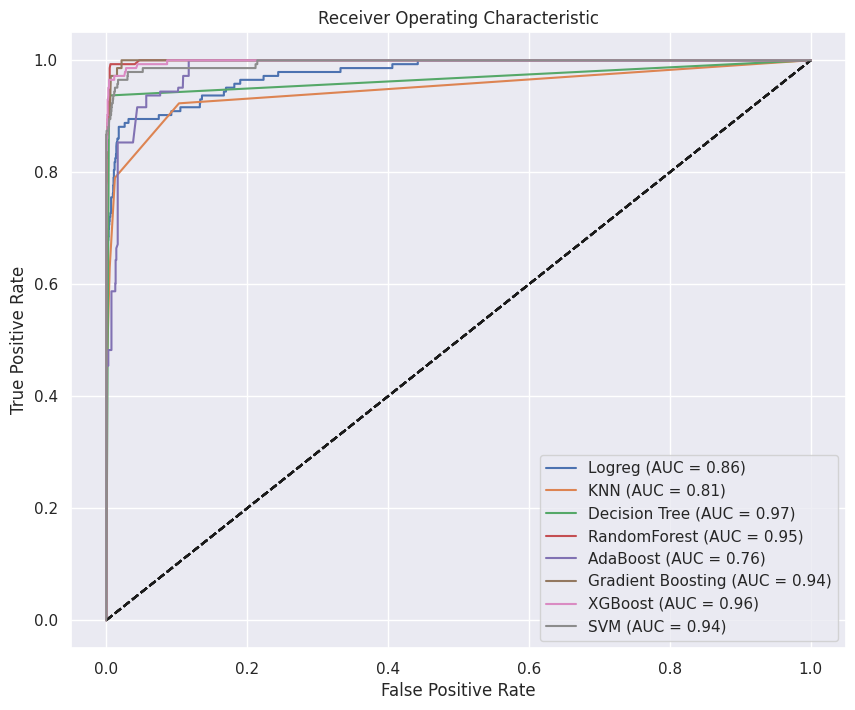

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))

for clf, clf_name in zip(clfs.values(), clfs.keys()):
    plt.plot([0, 1], [0, 1], 'k--')
    if hasattr(clf, 'predict_proba'):
        fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
        y_pred
        roc_auc = roc_auc_score(y_test, clf.predict(X_test))
        ax.plot(fpr, tpr, label=f'{clf_name} (AUC = {roc_auc:.2f})')
    else:
        print(f'Warning: {clf_name} does not support predict_proba()')

ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic')
ax.legend(loc='lower right')

plt.show()

In [ ]:
# Based on the AUC-ROC scores Decision Tree, Random Forest, and XGBoost demonstrate excellent performance in distinguishing between positive and negative classes.
# Logistic Regression, SVM, and Gradient Boosting show good performance.
# AdaBoost and K-Nearest Neighbors exhibit reasonable performance.

# **Optimizing Random Forest with RandomizedSearchCV:**
Hyperparameter Tuning for Enhanced Performance

In [286]:
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': [3, 5, 7, 9, None],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}


rfc = RandomForestClassifier(random_state=42)

n_iter_search = 50
cv = RandomizedSearchCV(rfc, param_distributions=param_dist, n_iter=n_iter_search, cv=5, scoring='recall', random_state=42, n_jobs=-1)
cv.fit(X_train, y_train)


print("Best Hyperparameters:\n", cv.best_params_)
print("Best Score:\n", cv.best_score_)


y_pred = cv.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)
print('AUC-ROC:', roc_auc)

Best Hyperparameters:
 {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 7, 'n_estimators': 494}
Best Score:
 0.8032432432432433
Accuracy: 0.9889247808029534
Precision: 0.9917355371900827
Recall: 0.8391608391608392
F1-score: 0.9090909090909092
AUC-ROC: 0.919333384007297


In [ ]:
# The Random Forest model, optimized with RandomizedSearchCV, achieved a recall of 83.92%, indicating its ability to correctly identify users who are likely to pay.

**Optimizing Random Forest with GridSearchCV:**

In [283]:
from sklearn.model_selection import GridSearchCV
param_grid = {'criterion': ['entropy', 'gini'],
              'max_features': ['sqrt', 'log2'],
              'n_estimators': [50, 150, 200],
              'max_depth': [10,20],
              'min_samples_split': [2, 3,5],
              'min_samples_leaf': [1, 2, 3]
}

rfc = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(rfc, param_grid, cv=5, scoring='recall')
grid_search.fit(X_train, y_train)
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'criterion': 'entropy', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best score:  0.8437117117117119


In [284]:
best_estimator = grid_search.best_estimator_
y_pred = best_estimator.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
kappa = cohen_kappa_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)
print("Accuracy:", accuracy)
print("F1 score:", f1)
print("Recall:", recall)
print("Precision:", precision)
print("Kappa:", kappa)

Best parameters: {'criterion': 'entropy', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best score: 0.8437117117117119
Accuracy: 0.9889247808029534
F1 score: 0.9104477611940298
Recall: 0.8531468531468531
Precision: 0.976
Kappa: 0.9045735276308885


In [ ]:
# The Random Forest model, optimized with GridSearchCV, achieved a higher recall of 85.31%.

**a. The most probable user profile that is likely to pay**

In [ ]:
# Decision Tree Recall: 93.71%
# Random Forest (RandomizedSearchCV) Recall: 83.92%
# Random Forest (GridSearchCV) Recall: 85.31%
# If maximizing recall is a primary goal and overfitting is not a concern, the Decision Tree model may be preferred. However, keep in mind that Decision Trees are prone to overfitting.

In [293]:
dt_classifier = DecisionTreeClassifier(random_state=42)
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
}

recall_scorer = make_scorer(recall_score)
random_search = RandomizedSearchCV(dt_classifier, param_distributions=param_dist, n_iter=100, scoring=recall_scorer, cv=5, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)


print("Best Hyperparameters:", random_search.best_params_)
print("Best Recall Score:", random_search.best_score_)

y_pred_dt_optimized = random_search.predict(X_test)

accuracy_dt_optimized = accuracy_score(y_test, y_pred_dt_optimized)
precision_dt_optimized = precision_score(y_test, y_pred_dt_optimized)
recall_dt_optimized = recall_score(y_test, y_pred_dt_optimized)
f1_dt_optimized = f1_score(y_test, y_pred_dt_optimized)
roc_auc_dt_optimized = roc_auc_score(y_test, y_pred_dt_optimized)
print('\nOptimized Decision Tree Metrics:')
print('Accuracy:', accuracy_dt_optimized)
print('Precision:', precision_dt_optimized)
print('Recall:', recall_dt_optimized)
print('F1-score:', f1_dt_optimized)
print('AUC-ROC:', roc_auc_dt_optimized)


Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 12, 'min_samples_leaf': 2, 'min_samples_split': 11}
Best Recall Score: 0.9514954954954955

Optimized Decision Tree Metrics:
Accuracy: 0.991693585602215
Precision: 0.9139072847682119
Recall: 0.965034965034965
F1-score: 0.9387755102040817
AUC-ROC: 0.9793060200668896


In [294]:
 # The optimized Decision Tree model is performing well across various metrics, with a particularly high recall score, which is desirable in scenarios where correctly identifying positive cases is crucial.

**Conclusion:**
The most probable user profile that is likely to pay, according to the optimized Decision Tree model, includes individuals exhibiting characteristics captured by the features used in the model.

These characteristics are learned during the training process and are indicative of a user's likelihood to pay for the course.

 Users with profiles resembling those identified by the model are more likely to convert into paying customers.

 We can do SMOTE to further increase the recall.

**b. Recommendations about what channels of acquisition should be retained and what should be discontinued.**

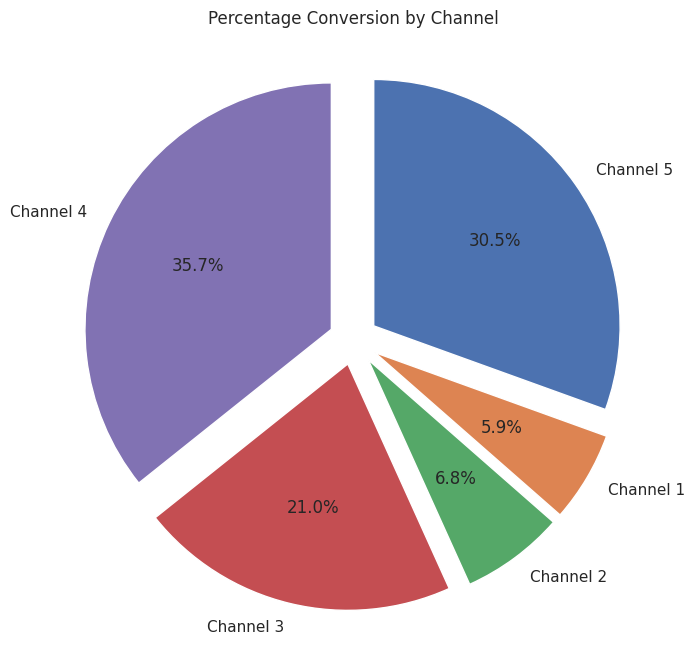

In [287]:
channel_counts_top = channel_counts_top[[1, 0]]

# Calculate conversion percentages
conversion_percentages = channel_counts_top[1] / (channel_counts_top[1] + channel_counts_top[0]) * 100

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(conversion_percentages, labels=channel_counts_top.index, autopct='%1.1f%%', startangle=90, counterclock=False, explode=[0.1] * len(channel_counts_top))
plt.title('Percentage Conversion by Channel')
plt.show()

In [289]:
# Channel 4 has the highest conversion rate (21%), making it a profitable channel.

# Channels 5 and 3 also show moderate conversion rates and are recommended for retention.

# Channels 1 and 2 have lower conversion rates and may require optimization or evaluation for continued use.

In [288]:
channel_counts_top

Paid for the Course,1,0
Channel Name,,
Channel 5,196,917
Channel 1,127,3577
Channel 2,111,2722
Channel 3,88,637
Channel 4,87,335


In [290]:
data = {
    'Channel Name': ['Channel 5', 'Channel 1', 'Channel 2', 'Channel 3', 'Channel 4'],
    'Paid for the Course 1': [196, 127, 111, 88, 87],
    'Paid for the Course 0': [917, 3577, 2722, 637, 335],
    'Cost per User': [180, 90, 0, 250, 350]
}

df_channel = pd.DataFrame(data)

# Calculate the total revenue, cost, and profit for each channel
df_channel['Total Revenue'] = df_channel['Paid for the Course 1'] * 100000  # (Cost of Paid course = INR 100,000)
df_channel['Total Cost'] = df_channel['Cost per User'] * (df_channel['Paid for the Course 1'] + df_channel['Paid for the Course 0'])
df_channel['Profit/Loss'] = df_channel['Total Revenue'] - df_channel['Total Cost']

# Display the result
print(df_channel[['Channel Name', 'Total Revenue', 'Total Cost', 'Profit/Loss']])

  Channel Name  Total Revenue  Total Cost  Profit/Loss
0    Channel 5       19600000      200340     19399660
1    Channel 1       12700000      333360     12366640
2    Channel 2       11100000           0     11100000
3    Channel 3        8800000      181250      8618750
4    Channel 4        8700000      147700      8552300


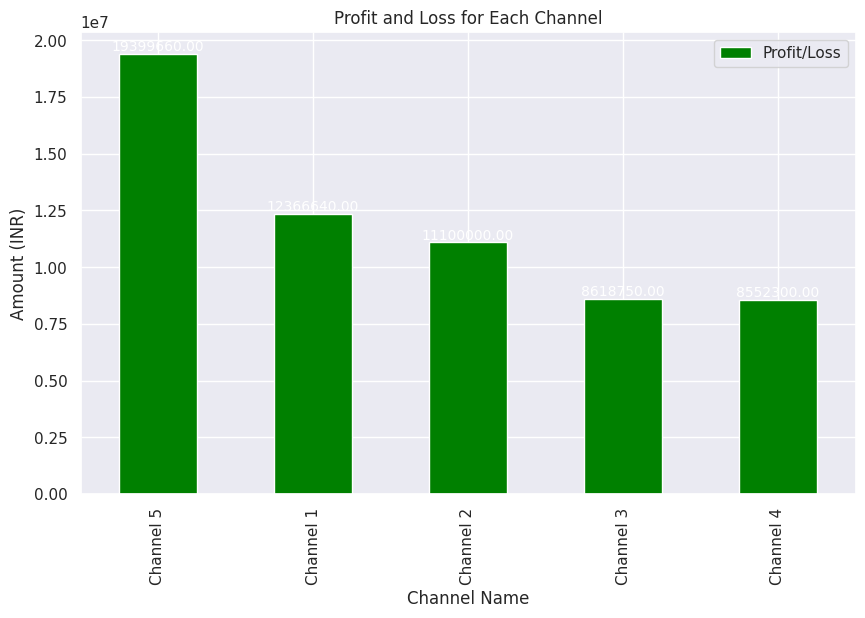

In [291]:
fig, ax = plt.subplots(figsize=(10, 6))
df_channel[['Channel Name', 'Profit/Loss']].set_index('Channel Name').plot(kind='bar', ax=ax, color=['green' if profit >= 0 else 'red' for profit in df_channel['Profit/Loss']])
ax.set_title('Profit and Loss for Each Channel')
ax.set_xlabel('Channel Name')
ax.set_ylabel('Amount (INR)')
ax.legend(['Profit/Loss'])
for p in ax.patches:
    height = p.get_height()
    label_x = p.get_x() + p.get_width() / 2
    label_y = height if height >= 0 else height - 50
    ax.text(label_x, label_y, f'{height:.2f}', ha='center', va='bottom' if height >= 0 else 'top', color='white', fontsize=10)
plt.show()

In [ ]:
# Based on the profitability analysis, all channels are contributing positively, and there is no channel that should be discontinued.
# However, it's essential to monitor the performance over time and make adjustments if there are changes in user behavior, market conditions, or acquisition costs.